In [ ]:
# ~ Καπετάνιος Δημήτριος 

# Μάθημα: Ειδικά θέματα Επεξεργασίας/Ανάλυσης Σημάτων & Εικόνων.
# Καθηγητής: κος Μ. Σαβελώνας PhD
# Τμήμα: Πληροφορικής με Εφαρμογές στη Βιοϊατρική
# Σχολή Θετικών Επιστημών::Πανεπιστήμιο Θεσσαλίας::Λαμία
# Ημερομηνία:  09/05/2023

In [ ]:
import webbrowser

url = "https://colab.research.google.com/github/facebookresearch/segment-anything/blob/main/notebooks/automatic_mask_generator_example.ipynb"
webbrowser.open(url)


In [ ]:

#import torch
#del 
#torch.cuda.empty_cache()

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
!rm -rf /content/sam_vit_h_4b8939.pth

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Thu May 11 08:54:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())
!python --version

PyTorch version: 2.0.0+cu118
Torchvision version: 0.15.1+cu118
CUDA is available: True
Python 3.10.11


**CUDA** 

In [5]:
import sys
!{sys.executable} -m pip install opencv-python matplotlib
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'
        
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-bww9_uoj
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-bww9_uoj
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36589 sha256=e6dddd390b2c53ce4cbf9c29f27d5a4dc055777bbc0dc67a62b5df54f446397c
  Stored in directory: /tmp/pip-ephem-wheel-cache-cbphysve/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything
--2023-05-11 08:55:41--  https://dl.fbaipublicfiles.com/segment_anything/s

In [6]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import os

In [7]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [8]:
image = cv2.imread('/content/drive/MyDrive/Bruna/X-rays/b_04_03_2022/IMG_1__20220304_134516.jpg')

In [9]:
# Get the image dimensions
height, width, channels = image.shape

# Print the image size
print(f"Image size:  {width} x {height} \n")

# Print the image channels
print(f"Image channels:   {channels}")

Image size:  3000 x 4000 

Image channels:   3


In [10]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [11]:
# Get the file size in bytes
file_size_bytes = os.path.getsize('/content/drive/MyDrive/Bruna/X-rays/b_04_03_2022/IMG_1__20220304_134516.jpg')
#file_size_bytes = os.path.getsize('/content/drive/MyDrive/Bruna/X-rays/b_04_03_2022/IMG_2__20220304_134521.jpg')
#file_size_bytes = os.path.getsize('/content/drive/MyDrive/Bruna/X-rays/b_04_03_2022/IMG_3__20220304_134528.jpg')

# Convert the file size to kilobytes and megabytes
file_size_kb = file_size_bytes / 1024
file_size_mb = file_size_kb / 1024

# Print the file size in kilobytes and megabytes
print(f"File size: {file_size_kb:.2f} KB ({file_size_mb:.2f} MB)")

File size: 1250.05 KB (1.22 MB)


The discrepancy between the file size and the memory size reported by the code is due to the way images are stored in memory as NumPy arrays compared to their compressed file format on disk.

When you read an image using OpenCV's cv2.imread() function, the image is loaded into memory as an uncompressed array of pixel values. This array is typically larger than the compressed image file size because image formats like JPEG and PNG use lossy or lossless compression to reduce file size.

The code you provided calculates the memory size of the image as a NumPy array, which represents the uncompressed size in memory. This is why the calculated memory size is larger than the image file size.

In [12]:
# Get the memory size of the image
memory_size = image.nbytes

# Convert the memory size to kilobytes and megabytes
memory_size_kb = memory_size / 1024
memory_size_mb = memory_size_kb / 1024

# Print the memory size in kilobytes and megabytes
print(f"Memory size: {memory_size_kb:.2f} KB ({memory_size_mb:.2f} MB)")

Memory size: 35156.25 KB (34.33 MB)


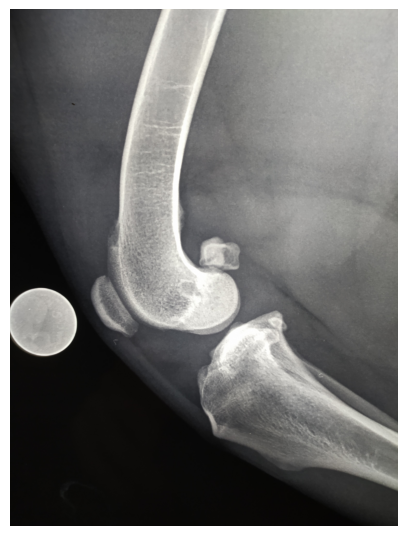

In [13]:
plt.figure(figsize=(5,20))
plt.imshow(image)
plt.axis('off')
plt.show()

1. Downsampling with interpolation: This method involves resizing the image to smaller dimensions, which will reduce the memory required for processing. Choose an interpolation method that minimizes the loss of information, such as bilinear, bicubic, or Lanczos resampling. This approach can help you process the image on a GPU with limited memory but may result in a loss of detail. Here's an example using OpenCV to resize an image with bicubic interpolation.

2. Image pyramids: This method represents the image at different scales, allowing you to retain important features while processing the image at a smaller scale. Choose the appropriate scale for your application to balance the trade-off between processing speed and feature preservation. Here's an example using OpenCV to create an image pyramid.

In [14]:
def create_image_pyramid(image, num_levels):
    pyramid = [image]
    for i in range(num_levels):
        downsampled_image = cv2.pyrDown(pyramid[-1])
        pyramid.append(downsampled_image)
    return pyramid

In [15]:
# Create the image pyramid.
pyramid = create_image_pyramid(image, 3)

In [ ]:
# Choose the appropriate level of the pyramid based on your requirements
# In this example, we choose the second level (index 1)
#downsampled_image_1 = pyramid[1]

In [16]:
# Choose the appropriate level of the down-scaling pyramid based on your requirements.

# In this example, we choose the second level (index 1)
downsampled_image_1 = pyramid[1]
# Get the image dimensions
height_1, width_1, channels_1 = downsampled_image_1.shape

# Print the image size
print(f"Down-sampled Image(1) size:  {width_1} x {height_1}")

# Get the memory size of the image
memory_size_1 = downsampled_image_1.nbytes
# Convert the memory size to kilobytes and megabytes
memory_size_kb_1 = memory_size_1 / 1024
memory_size_mb_1 = memory_size_kb_1 / 1024

# Print the memory size in kilobytes and megabytes
print(f"Memory size: {memory_size_kb_1:.2f} KB ({memory_size_mb_1:.2f} MB)")

Down-sampled Image(1) size:  1500 x 2000
Memory size: 8789.06 KB (8.58 MB)


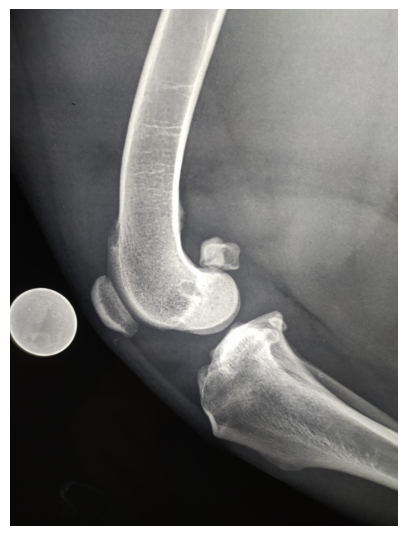

In [17]:
plt.figure(figsize=(5,20))
plt.imshow(downsampled_image_1)
plt.axis('off')
plt.show()

In [18]:
# Choose the appropriate level of the down-scaling pyramid based on your requirements.

# In this example, we choose the second level (index 2)
downsampled_image_2 = pyramid[2]
# Get the image dimensions
height_2, width_2, channels_2 = downsampled_image_2.shape

# Print the image size
print(f"Down-sampled Image(2) size:  {width_2} x {height_2}")

# Get the memory size of the image
memory_size_2 = downsampled_image_2.nbytes
# Convert the memory size to kilobytes and megabytes
memory_size_kb_2 = memory_size_2 / 1024
memory_size_mb_2 = memory_size_kb_2 / 1024

# Print the memory size in kilobytes and megabytes
print(f"Memory size: {memory_size_kb_2:.2f} KB ({memory_size_mb_2:.2f} MB)")

Down-sampled Image(2) size:  750 x 1000
Memory size: 2197.27 KB (2.15 MB)


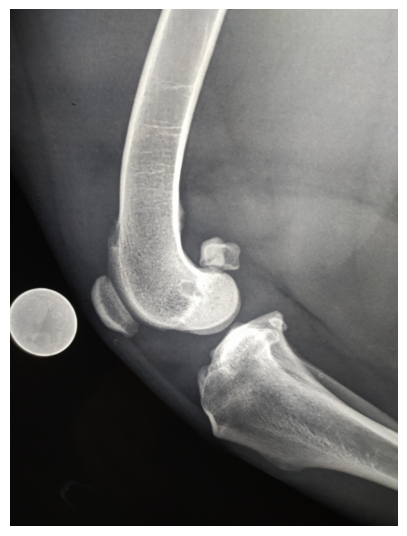

In [19]:
plt.figure(figsize=(5,20))
plt.imshow(downsampled_image_2)
plt.axis('off')
plt.show()

In [20]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [21]:
# masks = mask_generator.generate(image)
masks_1 = mask_generator.generate(downsampled_image_1)

In [22]:
print(len(masks_1))
print(masks_1[0].keys())

11
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


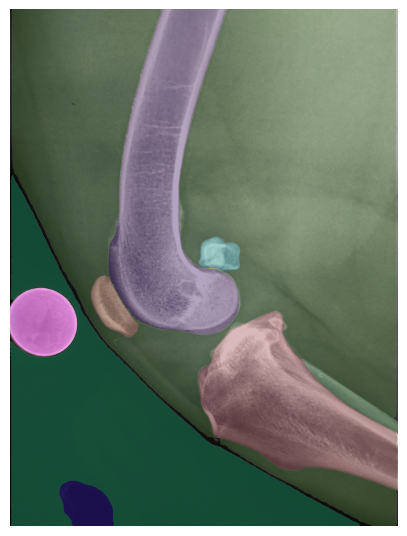

In [23]:
plt.figure(figsize=(5,20))
plt.imshow(downsampled_image_1)
show_anns(masks_1)
plt.axis('off')
plt.show() 

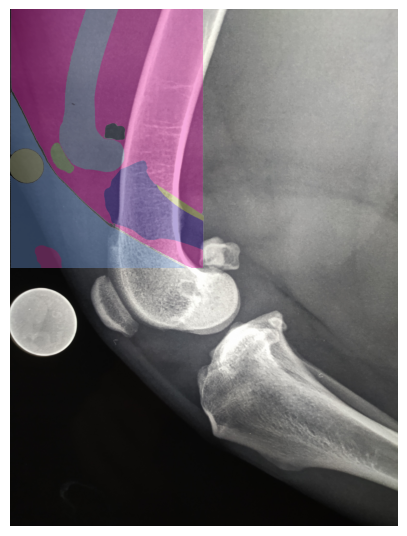

In [24]:
plt.figure(figsize=(5,20))
plt.imshow(image)
show_anns(masks_1)
plt.axis('off')
plt.show() 

In [25]:
masks_2 = mask_generator.generate(downsampled_image_2)

In [26]:
len(masks_2)

10

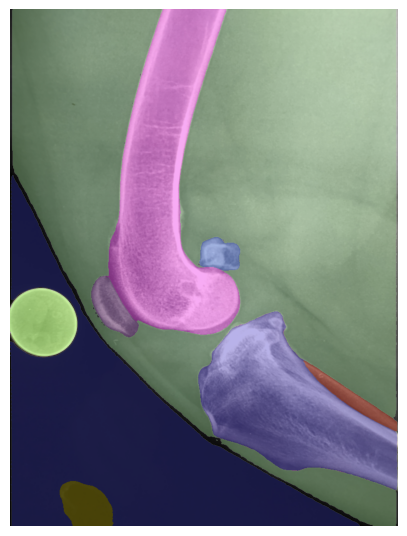

In [28]:
plt.figure(figsize=(5,20))
plt.imshow(downsampled_image_2)
show_anns(masks_2)
plt.axis('off')
plt.show() 

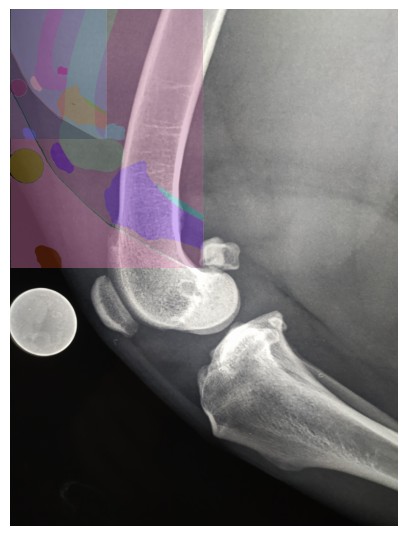

In [29]:
plt.figure(figsize=(5,20))
plt.imshow(image)
show_anns(masks_1)
show_anns(masks_2)
plt.axis('off')
plt.show() 